<a href="https://colab.research.google.com/github/Nasreen69/ML/blob/main/car_price_predicion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

### *Q1. Read the Dataset*

In [68]:
df = pd.read_csv(r'/content/autodata.csv')

In [5]:
df.head(4)

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000,2548,convertible,88.6,168.8,dohc,four,111,21,13495
1,alfa-romero,5000,2823,convertible,88.6,168.8,dohc,four,111,21,16500
2,alfa-romero,5500,2337,hatchback,?,171.2,ohcv,six,154,19,16500
3,audi,?,2824,sedan,99.8,176.6,ohc,four,102,24,13950


In [6]:
df.tail(4)

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
57,volkswagen,6000,2500,sedan,97.3,171.7,ohc,four,13213,37,7995
58,?,4800,2385,sedan,97.3,171.7,ohc,four,100,26,9995
59,volvo,4800,2410,sedan,104.3,188.8,ohc,four,114,23,12940
60,volvo,4800,2385,wagon,104.3,188.8,ohc,four,114,23,13415


In [4]:
df.shape

(61, 11)

In [ ]:
df.columns  #len(df.columns)

Index(['make', 'peak-rpm', 'curb-weight', 'body-style', 'wheel-base', 'length',
       'engine-type', 'num-of-cylinders', 'horsepower', 'city-mpg', 'price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              61 non-null     object 
 1   peak-rpm          61 non-null     object 
 2   curb-weight       61 non-null     object 
 3   body-style        61 non-null     object 
 4   wheel-base        61 non-null     object 
 5   length            61 non-null     float64
 6   engine-type       61 non-null     object 
 7   num-of-cylinders  61 non-null     object 
 8   horsepower        61 non-null     object 
 9   city-mpg          61 non-null     object 
 10  price             60 non-null     object 
dtypes: float64(1), object(10)
memory usage: 5.4+ KB


In [8]:
df.describe()

,length
count,61.000000
mean,173.098361
std,14.021846
min,141.100000
25%,159.100000
50%,171.200000
75%,177.300000
max,208.100000


# ***Data Pre-processing*** 

##### *Why do we need to clean the data?*

`Duplicates: causes redundancy and inconsistency also occupies storage space` 

`Extreme values: changes trends and statistics in data which may lead to bad decisions in industry`

`Empty values: which corrupt data and takes additional storage space`

*What if you don't clean the data?*

`when the data is not cleaned, contains some garbage values, captures noise and fails to predict test/unseen data and failed to get maximum accuracy `

In [ ]:
df.duplicated() # to check duplicate records
df.drop_duplicates(subset=['brand', 'style'], keep='last') # to remove duplicates  

### ***Q2. Find the total number of empty values in the dataset and replace it with 0***

In [9]:
df.isnull().values.any() #df.isna().values.any() ---> returns boolean value

True

In [10]:
df.isnull().sum()  #df.isna().sum()  --> returns binary count

make                0
peak-rpm            0
curb-weight         0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
city-mpg            0
price               1
dtype: int64

In [11]:
# Find the row number of null values in the price column
price_rows_nullno = df[df['price'].isnull()].index.tolist()

print("Null values are present in rows:", 
      "1.make_rows_nullno: ", price_rows_nullno, "\n" )

Null values are present in rows: 1.make_rows_nullno:  [47] 



In [12]:
df['price'] = df['price'].fillna(0)

### ***Q3. Find extreme values and replace it with np.nan***

In [13]:
df['make'].unique()  

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', '?', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df.replace('?',np.nan,inplace=True)

In [15]:
df.head(4)

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000,2548,convertible,88.6,168.8,dohc,four,111,21,13495
1,alfa-romero,5000,2823,convertible,88.6,168.8,dohc,four,111,21,16500
2,alfa-romero,5500,2337,hatchback,NaN,171.2,ohcv,six,154,19,16500
3,audi,NaN,2824,sedan,99.8,176.6,ohc,four,102,24,13950


### ***Q4. Replace Empty Values in numerical and categorical columns***

*numerical - mean*

*categorical - mode*

In [16]:
def get_mean(df):
    x=np.array(df.dropna().values,float)
    return x.mean()

In [17]:
df.make.fillna(df.make.mode()[0],inplace=True)
df['peak-rpm'].fillna(get_mean(df['peak-rpm']),inplace=True)
df['curb-weight'].fillna(get_mean(df['curb-weight']),inplace=True)
df['body-style'].fillna(df['body-style'].mode()[0],inplace=True)
df['wheel-base'].fillna(get_mean(df['wheel-base']),inplace=True)
df['engine-type'].fillna(df['engine-type'].mode()[0],inplace=True)
df['num-of-cylinders'].fillna(df['num-of-cylinders'].mode()[0],inplace=True)
df.horsepower.fillna(get_mean(df.horsepower),inplace=True)
df['city-mpg'].fillna(get_mean(df['city-mpg']),inplace=True)
df.price.fillna(get_mean(df.price),inplace=True)

In [18]:
df.head(5)

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000,2548,convertible,88.6,168.8,dohc,four,111,21,13495
1,alfa-romero,5000,2823,convertible,88.6,168.8,dohc,four,111,21,16500
2,alfa-romero,5500,2337,hatchback,99.066667,171.2,ohcv,six,154,19,16500
3,audi,5345.098039,2824,sedan,99.8,176.6,ohc,four,102,24,13950
4,audi,5500,2507,sedan,99.4,176.6,ohc,five,115,18,17450


### ***convert column datatypes***

In [19]:
df['peak-rpm'] = df['peak-rpm'].astype(float) # convert 'col2' to numeric df['col2'] = pd.to_numeric(df['col2'])
df['curb-weight'] = pd.to_numeric(df['curb-weight'])
df['wheel-base'] = df['wheel-base'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['city-mpg'] = df['city-mpg'].astype(float)
df['price'] = df['price'].astype(float)

In [20]:
df.dtypes

make                 object
peak-rpm            float64
curb-weight         float64
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower          float64
city-mpg            float64
price               float64
dtype: object

###  ***Q5.Remove Outliers***

*Before removing outliers*

In [21]:
import matplotlib.pyplot as plt

<Axes: >

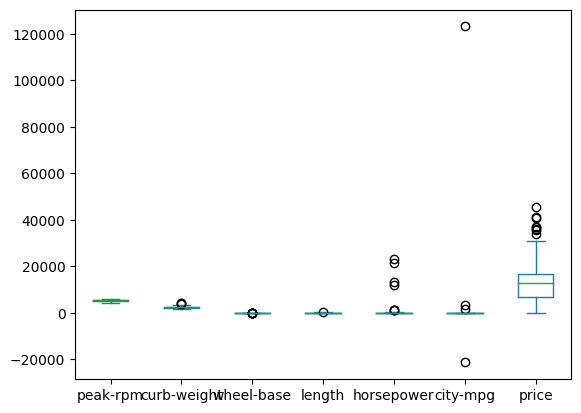

In [22]:
df.plot (kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0a7eff5280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0a7eff56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0a7efe1fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0a7eff5be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0a7eff5e80>],
 'means': []}

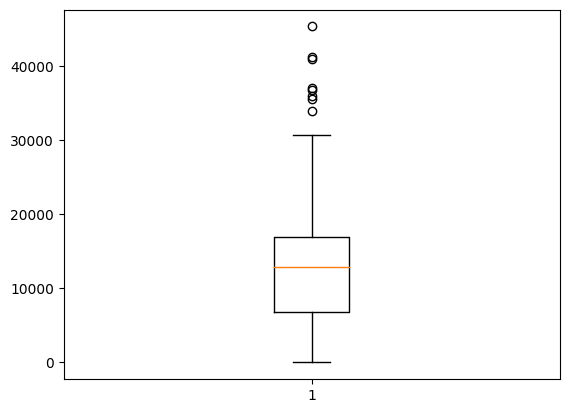

In [23]:
plt.boxplot(df['price'])

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
#df = df[(df['price'] > (Q1 - 1.5 * IQR)) | (df['price'] < (Q3 + 1.5 * IQR))]

In [26]:
outliers

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
11,bmw,4250.000000,2710.000000,sedan,103.5,193.8,ohc,six,182.0,16.0,41315.0
12,bmw,4250.000000,2765.000000,sedan,110.0,197.0,ohc,six,182.0,15.0,36880.0
25,jaguar,5345.098039,1989.000000,sedan,113.0,199.6,dohc,six,176.0,15.0,35550.0
26,jaguar,5500.000000,2450.842105,sedan,102.0,191.7,ohcv,twelve,262.0,13.0,36000.0
34,mercedes-benz,5345.098039,2010.000000,sedan,120.9,208.1,ohcv,eight,21312.0,14.0,40960.0
35,mercedes-benz,6000.000000,2024.000000,hardtop,112.0,199.2,ohcv,eight,184.0,14.0,45400.0
45,porsche,5000.000000,2734.000000,hardtop,89.5,168.9,ohcf,six,12123.0,17.0,34028.0
46,porsche,4750.000000,4066.000000,convertible,89.5,168.9,ohcf,six,207.0,17.0,37028.0


In [27]:
df.drop(outliers.index,inplace=True,axis=0)

*After removing outliers*

<Axes: >

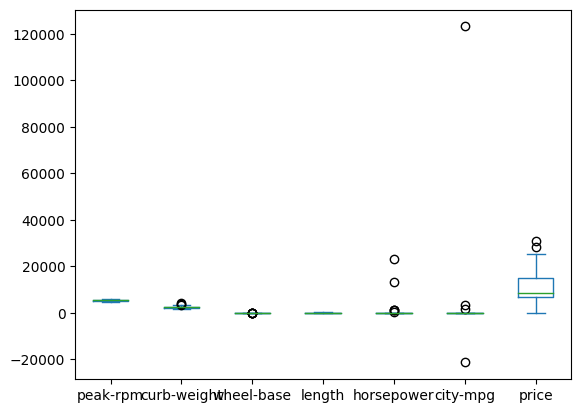

In [28]:
df.plot (kind='box')

### ***Cleaned Dataset*** 

In [29]:
df.shape

(53, 11)

In [30]:
df.describe()

,peak-rpm,curb-weight,wheel-base,length,horsepower,city-mpg,price
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,5388.882723,2429.292949,98.163522,170.411321,848.324984,2042.732390,11442.572327
std,370.811567,543.271229,4.938469,11.948763,3618.537782,17224.832158,6228.807743
min,4750.000000,1488.000000,88.400000,141.100000,48.000000,-21312.000000,0.000000
25%,5000.000000,1945.000000,95.700000,159.100000,68.000000,22.000000,6785.000000
50%,5400.000000,2385.000000,97.300000,170.200000,100.000000,27.000000,8778.000000
75%,5500.000000,2548.000000,99.800000,176.600000,121.000000,32.000000,14977.333333
max,6000.000000,4066.000000,113.000000,199.600000,23212.000000,123213.000000,30760.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 60
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              53 non-null     object 
 1   peak-rpm          53 non-null     float64
 2   curb-weight       53 non-null     float64
 3   body-style        53 non-null     object 
 4   wheel-base        53 non-null     float64
 5   length            53 non-null     float64
 6   engine-type       53 non-null     object 
 7   num-of-cylinders  53 non-null     object 
 8   horsepower        53 non-null     float64
 9   city-mpg          53 non-null     float64
 10  price             53 non-null     float64
dtypes: float64(7), object(4)
memory usage: 5.0+ KB


### *ML Algorithm* 

*As price column is continuous so it is linear regression problem*

In [34]:
# filter out the categorical variables and consider only the numeric variables using (include=np.number)
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['peak-rpm', 'curb-weight', 'wheel-base', 'length', 'horsepower',
       'city-mpg', 'price'],
      dtype='object')

In [35]:
# filter out the numerical variables and consider only the categorical variables using (include=object)
df_categoric_features = df.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

In [37]:
# to create the dummy variables  we use 'get_dummies()' from pandas
# to create (n-1) dummy variables we use 'drop_first = True'
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [38]:
dummy_encoded_variables.shape

(53, 27)

In [39]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df.head()

,peak-rpm,curb-weight,wheel-base,length,horsepower,city-mpg,price,make_audi,make_bmw,make_chevrolet,...,body-style_wagon,engine-type_dohcv,engine-type_ohc,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_two
0,5000.000000,2548.0,88.600000,168.8,111.0,21.0,13495.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5000.000000,2823.0,88.600000,168.8,111.0,21.0,16500.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5500.000000,2337.0,99.066667,171.2,154.0,19.0,16500.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,5345.098039,2824.0,99.800000,176.6,102.0,24.0,13950.0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,5500.000000,2507.0,99.400000,176.6,115.0,18.0,17450.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### *sklearn framework*

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Split the data into 80% training and  20% test
X = df.drop(['price'],axis = 1)
y = df['price']

# split data into train data and test data
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
# print the shape of 'x_train'
print("X_train ",X_train.shape)

X_train  (42, 33)


In [44]:
# print the shape of 'x_test'
print("X_test ",X_test.shape)

X_test  (11, 33)


In [45]:
# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

y_train  (42,)
y_test  (11,)


In [32]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [60]:
model.fit(X_train, y_train)

In [61]:
model.coef_

array([  227.74830757, -1790.18653024,  3563.44199826,  7560.20707405,
          76.86329002, -5455.01141676, -1798.61310435, -2084.74861147,
         594.09098698, -1710.24501357, -1086.49342587,   886.16406066,
       -3780.32467955, -1761.30037108,  2945.9718715 , -1685.26461503,
       -2456.0775727 , -1034.51131721,  -525.76694414, -2191.78053272,
       -3379.9182632 , -3814.70788008, -6528.45060621, -7233.31197742,
       -1034.51131721,  2839.67158619,  -515.37267784,   250.41169804,
         269.33097159,  -438.96429939,   457.66195899,   594.09098698,
         250.41169804])

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn import metrics

In [53]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
r2 = metrics.r2_score(y_test,y_pred)
n = X_train.shape[0]  # sample size
p = X_test.shape[1]  # number of independent variables
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print(MAE, MSE, RMSE)

In [67]:
print('R-squared:', r2)
print('Adjusted R-squared:', adj_r2)

R-squared: -2.3039544626910042
Adjusted R-squared: -15.932766621291396


### *statsmodels framework*

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_logmodel_full = sm.OLS(y_train, X_train).fit()

In [ ]:
# print the summary output
print(linreg_logmodel_full.summary())

In [ ]:
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

In [ ]:
# take the exponential of predictions using np.exp()
predicted_Price = np.exp(linreg_logmodel_full_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Price = y_test

In [ ]:
# calculate rmse using rmse()
linreg_logmodel_full_rmse = rmse(actual_Price, predicted_Price)

# calculate R-squared using rsquared
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj